# TIME SERIES ANALYSIS

Appu Mathews Madathil  MDS201814

# # Importing packages

In [2]:
!pip install pmdarima
!pip install arch

In [0]:
import pmdarima 
import numpy as np 
import pandas as pd 
import os
from statsmodels.tsa.stattools import acf, pacf
import matplotlib.pyplot as plt
from scipy.stats import kurtosis
from scipy.stats import skew

import statsmodels.api as sm


from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss

from statsmodels.tsa.arima_model import ARIMA
from pmdarima import auto_arima

import chart_studio.plotly as ply
from chart_studio.plotly import plot_mpl
from statsmodels.tsa.seasonal import seasonal_decompose
from arch import arch_model
from arch.unitroot import PhillipsPerron


## Processing the Data 

In [4]:
df = pd.read_csv(r'TSLA_Jan1st2014_Dec31st2019.csv', index_col=0)
df.index = pd.to_datetime(df.index, format="%Y/%m/%d")

#df= pd.read_csv(r'C:\Users\Supreme Leader\Desktop\TIME SERIES FINANCE TEST\prices-split-adjusted.csv', index_col=0)
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-12-24,313.500000,314.500000,295.200012,295.390015,295.390015,5559900
2018-12-26,300.000000,326.970001,294.089996,326.089996,326.089996,8163100
2018-12-27,319.839996,322.170013,301.500000,316.130005,316.130005,8575100
2018-12-28,323.100006,336.239990,318.410004,333.869995,333.869995,9939000
2018-12-31,337.790009,339.209991,325.260010,332.799988,332.799988,6302300


In [0]:
# Convert index to pandas datetime
#df.index = pd.to_datetime(df.index, format="%Y/%m/%d")
#df = df[df['symbol'] == 'AAPL']


In [0]:



#df_final = df.drop(['open','low','high','volume','symbol'], axis=1)

#df_final = df_final.rename(columns={'close': 'Close'})

#df_final.head()

In [5]:
df_final = df.drop(['Adj Close','Open','Low','High','Volume'], axis=1)
df_final.head()

,Close
Date,
2014-01-02,150.100006
2014-01-03,149.559998
2014-01-06,147.000000
2014-01-07,149.360001
2014-01-08,151.279999


In [6]:
df_final.tail()

,Close
Date,
2018-12-24,295.390015
2018-12-26,326.089996
2018-12-27,316.130005
2018-12-28,333.869995
2018-12-31,332.799988


In [7]:
df_final.describe()

,Close
count,1258.000000
mean,258.862695
std,55.432277
min,139.339996
25%,214.322499
50%,247.735000
75%,307.907502
max,385.000000


In [0]:
#returns = 100 * df_final['Close'].pct_change()
#returns.dropna(inplace =True)
#log_returns = np.log(returns).replace(-np.inf, 0.001)
#log_returns.dropna(inplace = True)

In [0]:
returns = df_final['Close']
log_returns = np.log(returns).replace(-np.inf,0)
log_returns.dropna(inplace = True)
log_returns_diff = log_returns - log_returns.shift(1)
log_returns_diff.dropna(inplace = True)


In [9]:
log_returns

Date
2014-01-02    5.011302
2014-01-03    5.007698
2014-01-06    4.990433
2014-01-07    5.006360
2014-01-08    5.019132
                ...   
2018-12-24    5.688297
2018-12-26    5.787173
2018-12-27    5.756154
2018-12-28    5.810752
2018-12-31    5.807542
Name: Close, Length: 1258, dtype: float64

In [10]:
original = df_final
log_returns_diff_df= log_returns_diff.to_frame().reset_index()
log_original = log_returns_diff
type(log_returns_diff_df)

pandas.core.frame.DataFrame

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


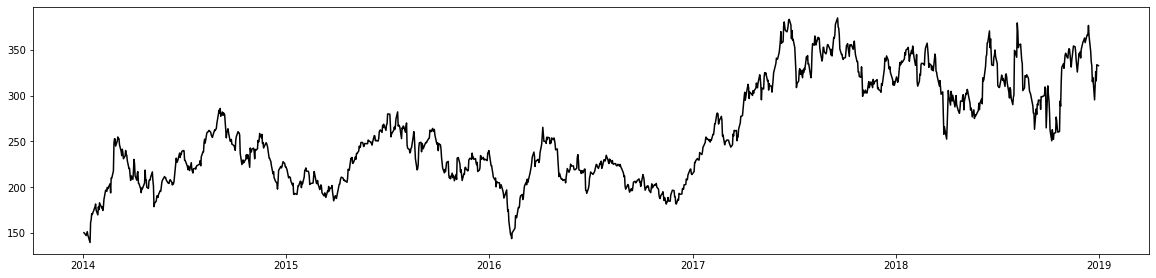

In [11]:
#Original Data
    
fig = plt.figure(figsize=(20,10))
plt.subplot(211)
plt.plot(original['Close'], color='black', label='Original Data')

In [12]:
print("skew : ",skew(df_final))
print("kurt : ",kurtosis(df_final))

skew :  [0.40905132]
kurt :  [-0.93256193]


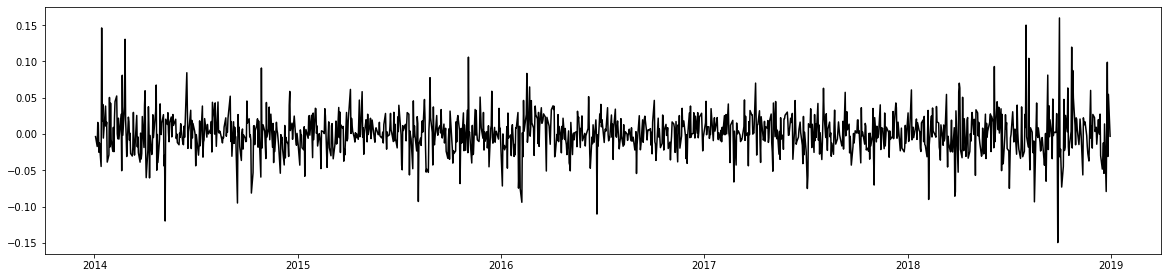

In [13]:
#log return data

fig = plt.figure(figsize=(20,10))
plt.subplot(211)
plt.plot(log_returns_diff, color='black', label='Original Data')

In [94]:
print("skew : ",skew(log_returns_diff))
print("kurt : ",kurtosis(log_returns_diff))

skew :  0.2425336907578671
kurt :  4.178621096364348


In [14]:
log_returns = pd.DataFrame(log_returns)
log_returns

,Close
Date,
2014-01-02,5.011302
2014-01-03,5.007698
2014-01-06,4.990433
2014-01-07,5.006360
2014-01-08,5.019132
...,...
2018-12-24,5.688297
2018-12-26,5.787173
2018-12-27,5.756154


In [15]:
log_returns_diff = pd.DataFrame(log_returns_diff)
log_returns_diff

,Close
Date,
2014-01-03,-0.003604
2014-01-06,-0.017265
2014-01-07,0.015927
2014-01-08,0.012773
2014-01-09,-0.025101
...,...
2018-12-24,-0.079305
2018-12-26,0.098877
2018-12-27,-0.031020


In [18]:
df_final = pd.Series(df_final['Close'])
df_final

Date
2014-01-02    150.100006
2014-01-03    149.559998
2014-01-06    147.000000
2014-01-07    149.360001
2014-01-08    151.279999
                 ...    
2018-12-24    295.390015
2018-12-26    326.089996
2018-12-27    316.130005
2018-12-28    333.869995
2018-12-31    332.799988
Name: Close, Length: 1258, dtype: float64

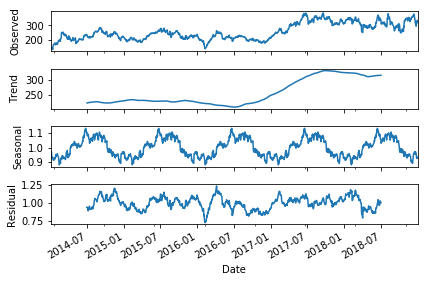

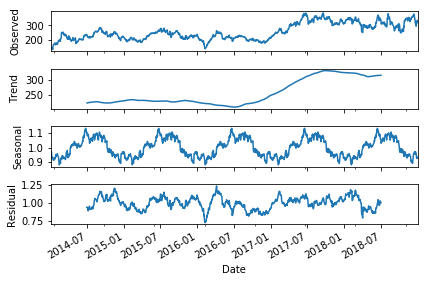

In [19]:

from statsmodels.tsa.seasonal import seasonal_decompose
seasonal_decompose(df_final,freq = 250,  model='multiplicative').plot()


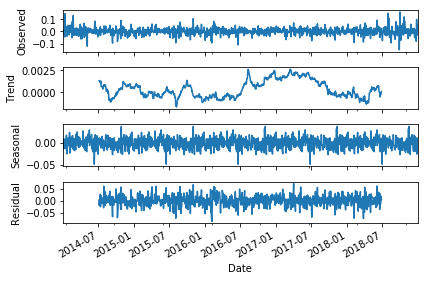

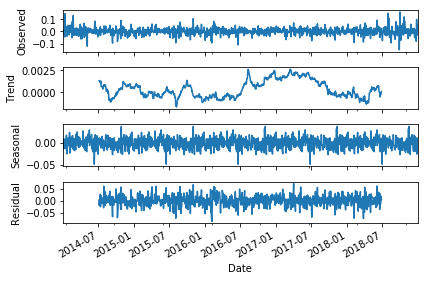

In [0]:
from statsmodels.tsa.seasonal import seasonal_decompose
seasonal_decompose(log_returns_diff,freq = 255,  model='additive').plot()

In [0]:
def check_stationarity(ts_data):
    
    # Rolling statistics
    roll_mean = ts_data.rolling(30).mean()
    roll_std = ts_data.rolling(5).std()
    
    # Plot rolling statistics
    fig = plt.figure(figsize=(20,10))
    plt.subplot(211)
    plt.plot(ts_data, color='black', label='Original Data')
    plt.plot(roll_mean, color='red', label='Rolling Mean(30 days)')
    plt.legend()
    plt.subplot(212)
    plt.plot(roll_std, color='green', label='Rolling Std Dev(5 days)')
    plt.legend()
    
    # Dickey-Fuller test - Null hypothesis : The series is not stationary
    print('Dickey-Fuller Test results\n')
    df_test_adf = adfuller(ts_data, regresults=False)
    test_result = pd.Series(df_test_adf[0:4], index=['ADF Test Statistic','ADF p-value','# of lags','# of obs'])
    print(test_result)
    for k,v in df_test_adf[4].items():
        print('Critical value at %s: %1.5f' %(k,v))
    print('\n')   
    # KPSS Test - Null Hypothesis : The series is stationary
    df_test_kpss = kpss(ts_data)
    test_result_kpss = pd.Series(df_test_kpss[0:4], index=['KPSS Test Statistic','KPSS p-value KPSS','# of lags','Significance Level : Test statistic values'])
    print('KPSS Test Results\n')
    print(test_result_kpss[0:3])
    for k,v in df_test_kpss[3].items():
        print('Critical value at %s: %1.5f' %(k,v))
    
    # PP Test
    
    X = PhillipsPerron(ts_data, lags=None, trend='c', test_type='tau')
    print('\n')
    
    print(X)
        

Dickey-Fuller Test results

ADF Test Statistic      -2.593374
ADF p-value              0.094375
# of lags                0.000000
# of obs              1257.000000
dtype: float64
Critical value at 1%: -3.43556
Critical value at 5%: -2.86384
Critical value at 10%: -2.56800


KPSS Test Results

KPSS Test Statistic    3.22641
KPSS p-value KPSS         0.01
# of lags                   23
dtype: object
Critical value at 10%: 0.34700
Critical value at 5%: 0.46300
Critical value at 2.5%: 0.57400
Critical value at 1%: 0.73900


     Phillips-Perron Test (Z-tau)    
Test Statistic                 -2.452
P-value                         0.128
Lags                               23
-------------------------------------

Trend: Constant
Critical Values: -3.44 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1708: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


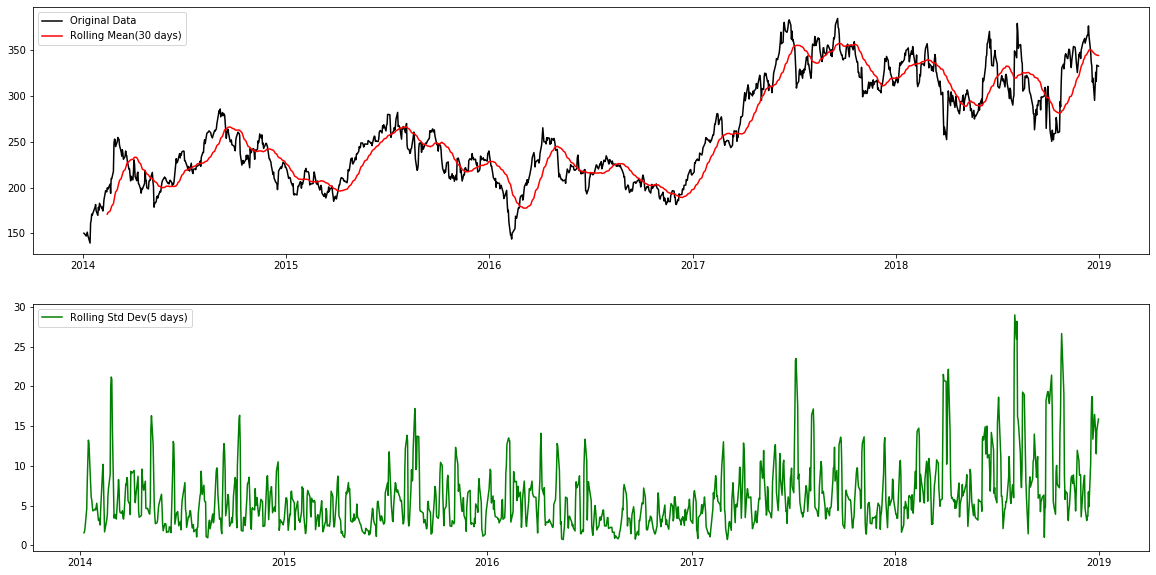

In [21]:

check_stationarity(df_final)

Dickey-Fuller Test results

ADF Test Statistic     -36.012253
ADF p-value              0.000000
# of lags                0.000000
# of obs              1256.000000
dtype: float64
Critical value at 1%: -3.43557
Critical value at 5%: -2.86384
Critical value at 10%: -2.56800


KPSS Test Results

KPSS Test Statistic    0.0515902
KPSS p-value KPSS            0.1
# of lags                     23
dtype: object
Critical value at 10%: 0.34700
Critical value at 5%: 0.46300
Critical value at 2.5%: 0.57400
Critical value at 1%: 0.73900


     Phillips-Perron Test (Z-tau)    
Test Statistic                -36.086
P-value                         0.000
Lags                               23
-------------------------------------

Trend: Constant
Critical Values: -3.44 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1710: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


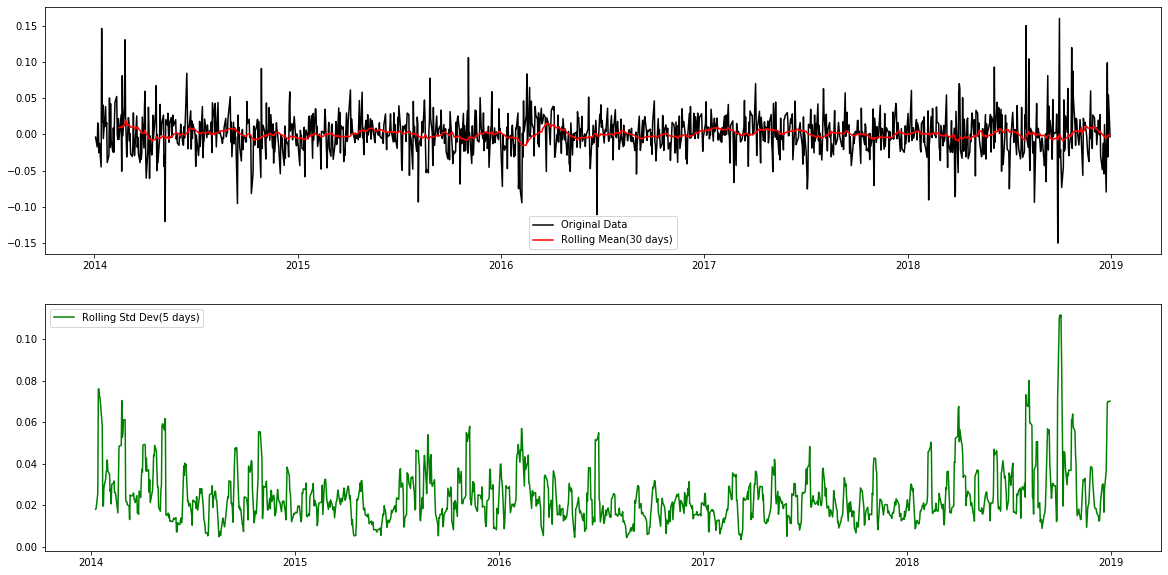

In [22]:
# Check stationarity
#df_final_log.dropna(inplace=True)

log_returns_diff = pd.Series(log_returns_diff['Close'])
check_stationarity(log_returns_diff)

Dickey-Fuller Test results

ADF Test Statistic      -2.815991
ADF p-value              0.056026
# of lags                0.000000
# of obs              1257.000000
dtype: float64
Critical value at 1%: -3.43556
Critical value at 5%: -2.86384
Critical value at 10%: -2.56800


KPSS Test Results

KPSS Test Statistic    3.11481
KPSS p-value KPSS         0.01
# of lags                   23
dtype: object
Critical value at 10%: 0.34700
Critical value at 5%: 0.46300
Critical value at 2.5%: 0.57400
Critical value at 1%: 0.73900


     Phillips-Perron Test (Z-tau)    
Test Statistic                 -2.786
P-value                         0.060
Lags                               23
-------------------------------------

Trend: Constant
Critical Values: -3.44 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1708: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


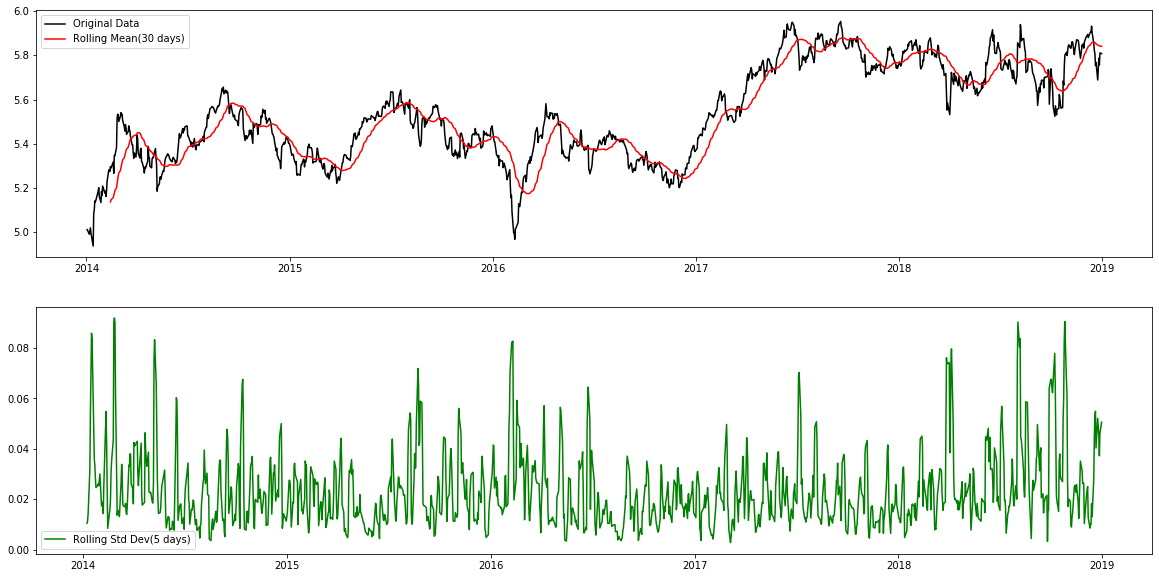

In [23]:
log_returns = pd.Series(log_returns['Close'])
check_stationarity(log_returns)

In [0]:
# Differencing
#df_final_diff = df_final - df_final.shift(1)

In [0]:
# Check stationarity
#df_final_diff.dropna(inplace=True)
#check_stationarity(df_final_diff)

In [0]:
df_acf = acf(df_final)
df_pacf = pacf(df_final)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


In [24]:
df_acf = acf(log_returns_diff)
df_pacf = pacf(log_returns_diff)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


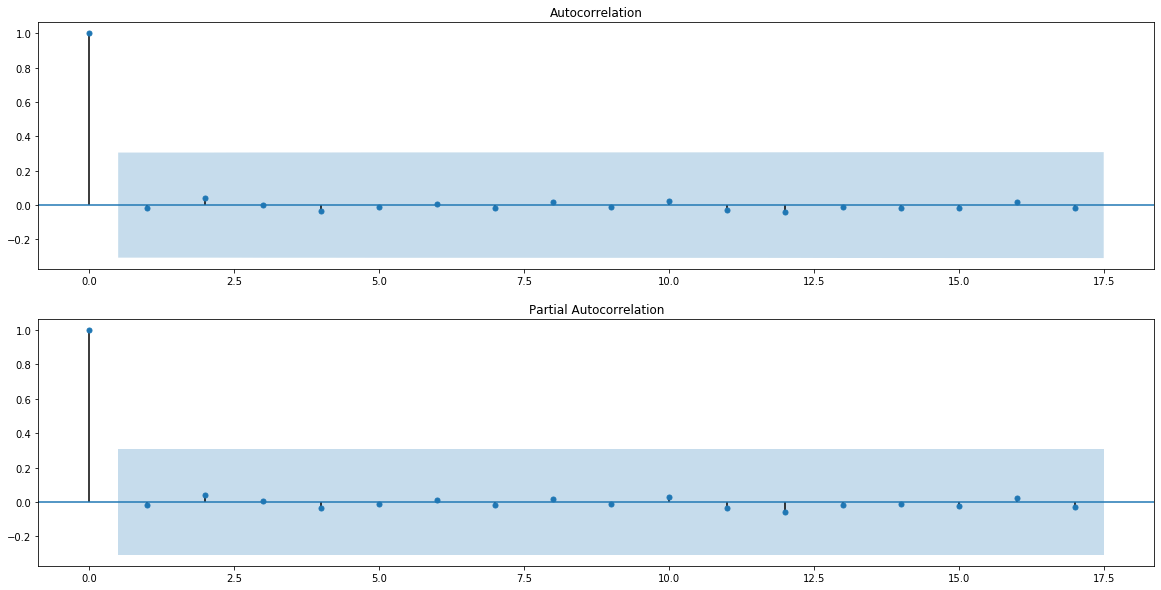

In [26]:
import statsmodels.api as sm
fig1 = plt.figure(figsize=(20,10))
ax1 = fig1.add_subplot(211)
fig1 = sm.graphics.tsa.plot_acf(df_acf, ax=ax1)
ax2 = fig1.add_subplot(212)
fig1 = sm.graphics.tsa.plot_pacf(df_pacf, ax=ax2)

# AUTO ARIMA

#Log transformed Data

In [0]:
train_log = log_returns.loc[:'2018-12-21']
test_index_log = log_returns.loc['2018-12-24':].index.values
#test = log_returns.loc['2018-12-24':]
test = df_final.loc['2018-12-24':]

In [28]:
stepwise_model_log = auto_arima(train_log, start_p=0, start_q=0,
                           max_p=3, max_q=3,
                           start_P=0, seasonal=True,
                           trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=-5415.616, BIC=-5405.351, Fit time=0.184 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=-5413.625, BIC=-5398.228, Fit time=0.137 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=-5413.625, BIC=-5398.227, Fit time=0.182 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=-5411.563, BIC=-5391.033, Fit time=0.124 seconds
Total fit time: 0.664 seconds


In [29]:
stepwise_model_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 1253
Model:               SARIMAX(0, 1, 0)   Log Likelihood                2709.808
Date:                Tue, 19 Nov 2019   AIC                          -5415.616
Time:                        06:26:20   BIC                          -5405.351
Sample:                             0   HQIC                         -5411.757
                               - 1253                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0006      0.001      0.766      0.444      -0.001       0.002
sigma2         0.0008   1.75e-05     44.065      0.000       0.001       0.001
===================================================================================
Ljung-Box (Q):                       35.85   Jarque-Bera (JB):               956.71
Prob(Q):                              0.66   Prob(JB):                         0.00
Heteroskedasticity (H):               1.24   Skew:                             0.23
Prob(H) (two-sided):                  0.03   Kurtosis:                         7.26
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [30]:
future_forecast = stepwise_model_log.predict(n_periods=5)
future_forecast = np.exp(future_forecast)
future_forecast

array([319.96318018, 320.15648807, 320.34991275, 320.5434543 ,
       320.73711277])

In [31]:
future_forecast = pd.DataFrame(future_forecast,index = test.index,columns=['Prediction'])

future_forecast.head()

future_forecast.index = pd.to_datetime(future_forecast.index, format="%Y/%m/%d")

type(future_forecast)

pandas.core.frame.DataFrame

In [32]:
test_df = test.to_frame().reset_index()

test_df.set_index('Date', inplace=True)

test_df.index = pd.to_datetime(test_df.index, format="%Y/%m/%d")

#future_forecast.index = pd.to_datetime(future_forecast.index, format="%Y/%m/%d")

type(test_df)

pandas.core.frame.DataFrame

In [33]:
future_forecast

,Prediction
Date,
2018-12-24,319.963180
2018-12-26,320.156488
2018-12-27,320.349913
2018-12-28,320.543454
2018-12-31,320.737113


In [34]:
test_df

,Close
Date,
2018-12-24,295.390015
2018-12-26,326.089996
2018-12-27,316.130005
2018-12-28,333.869995
2018-12-31,332.799988


Plotting and Testing

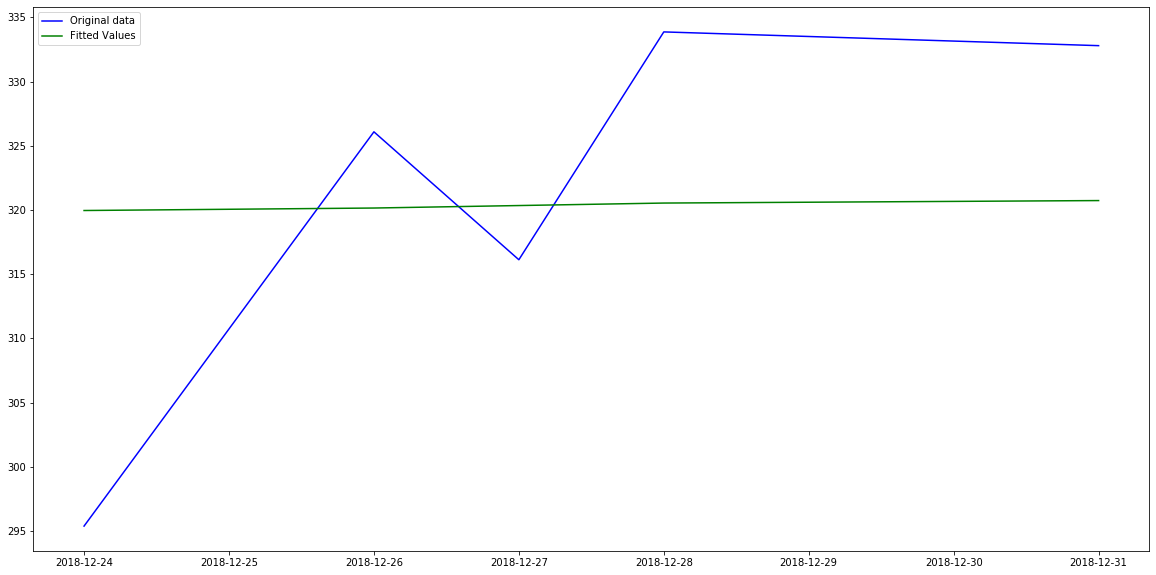

In [35]:
plt.figure(figsize=(20,10))
plt.plot(test_df, color='blue', label='Original data')
plt.plot(future_forecast, color='green', label='Fitted Values')
plt.legend()

In [36]:
future_forecast['Actual'] = test_df['Close']
future_forecast['Residual_Squared'] = np.square(future_forecast['Actual']-future_forecast['Prediction'])
future_forecast

,Prediction,Actual,Residual_Squared
Date,,,
2018-12-24,319.963180,295.390015,603.840447
2018-12-26,320.156488,326.089996,35.206516
2018-12-27,320.349913,316.130005,17.807621
2018-12-28,320.543454,333.869995,177.596687
2018-12-31,320.737113,332.799988,145.512959


In [37]:
residuals_log = stepwise_model_log.resid()
len(residuals_log)


1253

In [38]:
residuals_log

array([ 5.01069780e+00, -4.20811613e-03, -1.78690242e-02, ...,
       -1.27235196e-02, -5.48780963e-02,  1.32197019e-02])

In [39]:
len(train_log[0:1253])

1253

In [0]:
residuals_log_df = pd.DataFrame(residuals_log,index = train_log.index,columns = ['Residual_log_diff'])
#residuals_df['Residual_log_diff'] = residuals_log_diff
residuals_log_df['Actual'] = train_log[0:1253].values
residuals_log_df['exp'] = np.exp(residuals_log_df['Residual_log_diff'])
residuals_log_df['Forecast_Actual'] = residuals_log_df['exp']*residuals_log_df['Actual']
residuals_log_df['Residual_True'] = residuals_log_df['Forecast_Actual'] - residuals_log_df['Actual']

In [0]:
R = residuals_log_df['Residual_True'].values

In [43]:
sm.stats.acorr_ljungbox((R),lags = [12])

(array([0.00181538]), array([1.]))

In [44]:
sm.stats.acorr_ljungbox(np.square(R),lags = [12])

(array([3.21842706e-07]), array([1.]))

In [45]:
sm.stats.acorr_ljungbox(residuals_log, lags=[24])

(array([1.75496566]), array([1.]))

In [48]:
sm.stats.acorr_ljungbox(np.square(residuals_log), lags=[12])

(array([0.00083713]), array([1.]))

#Original Data

In [0]:
train_real = df_final.loc[:'2018-12-21']
test_index_real = df_final.loc['2018-12-24':].index.values
test = df_final.loc['2018-12-24':]

In [50]:
train_real.tail()

Date
2018-12-17    348.420013
2018-12-18    337.029999
2018-12-19    332.970001
2018-12-20    315.380005
2018-12-21    319.769989
Name: Close, dtype: float64

In [51]:
test

Date
2018-12-24    295.390015
2018-12-26    326.089996
2018-12-27    316.130005
2018-12-28    333.869995
2018-12-31    332.799988
Name: Close, dtype: float64

In [52]:
test_index_real

array(['2018-12-24T00:00:00.000000000', '2018-12-26T00:00:00.000000000',
       '2018-12-27T00:00:00.000000000', '2018-12-28T00:00:00.000000000',
       '2018-12-31T00:00:00.000000000'], dtype='datetime64[ns]')

In [0]:
#train = returns.loc[:'2016-10-06']
#test_index = returns.loc['2016-10-06':].index.values
#test = returns.loc['2016-10-06':]

In [53]:
stepwise_model = auto_arima(train_real, start_p=0, start_q=0,
                           max_p=3, max_q=3,
                           start_P=0, seasonal=True,
                            trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model.aic())

Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=8539.276, BIC=8549.541, Fit time=0.033 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=8541.126, BIC=8556.523, Fit time=0.092 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=8541.130, BIC=8556.527, Fit time=0.122 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=8534.984, BIC=8555.514, Fit time=1.030 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=8544.820, BIC=8570.483, Fit time=0.816 seconds
Fit ARIMA: order=(1, 1, 2) seasonal_order=(0, 0, 0, 1); AIC=8544.778, BIC=8570.440, Fit time=0.546 seconds
Fit ARIMA: order=(2, 1, 2) seasonal_order=(0, 0, 0, 1); AIC=8529.469, BIC=8560.264, Fit time=2.786 seconds
Fit ARIMA: order=(3, 1, 2) seasonal_order=(0, 0, 0, 1); AIC=8534.332, BIC=8570.259, Fit time=3.000 seconds
Fit ARIMA: order=(2, 1, 3) seasonal_order=(0, 0, 0, 1); AIC=8532.967, BIC=8568.894, Fit time=3.187 seconds
Fit ARIMA: order=(3, 1, 3) seasonal_o

In [54]:
stepwise_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 1253
Model:               SARIMAX(2, 1, 2)   Log Likelihood               -4258.734
Date:                Tue, 19 Nov 2019   AIC                           8529.469
Time:                        06:29:08   BIC                           8560.264
Sample:                             0   HQIC                          8541.045
                               - 1253                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.3364      0.422      0.797      0.426      -0.491       1.164
ar.L1         -0.0153      0.010     -1.501      0.133      -0.035       0.005
ar.L2         -0.9634      0.011    -85.412      0.000      -0.986      -0.941
ma.L1          0.0081      0.005      1.762      0.078      -0.001       0.017
ma.L2          0.9967      0.008    117.859      0.000       0.980       1.013
sigma2        52.8733      1.167     45.316      0.000      50.587      55.160
===================================================================================
Ljung-Box (Q):                       39.80   Jarque-Bera (JB):              1564.59
Prob(Q):                              0.48   Prob(JB):                         0.00
Heteroskedasticity (H):               2.43   Skew:                             0.27
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.45
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [0]:
stepwise_model.fit(train_real)


ARIMA(callback=None, disp=0, maxiter=None, method=None, order=(2, 1, 2),
      out_of_sample_size=0, scoring='mse', scoring_args=None,
      seasonal_order=(0, 0, 0, 1), solver='lbfgs', start_params=None,
      suppress_warnings=True, transparams=True, trend=None,
      with_intercept=True)

In [0]:
stepwise_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 1253
Model:               SARIMAX(2, 1, 2)   Log Likelihood               -4258.734
Date:                Sat, 16 Nov 2019   AIC                           8529.469
Time:                        04:53:20   BIC                           8560.264
Sample:                             0   HQIC                          8541.045
                               - 1253                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.3364      0.422      0.797      0.426      -0.491       1.164
ar.L1         -0.0153      0.010     -1.501      0.133      -0.035       0.005
ar.L2         -0.9634      0.011    -85.412      0.000      -0.986      -0.941
ma.L1          0.0081      0.005      1.762      0.078      -0.001       0.017
ma.L2          0.9967      0.008    117.859      0.000       0.980       1.013
sigma2        52.8733      1.167     45.316      0.000      50.587      55.160
===================================================================================
Ljung-Box (Q):                       39.80   Jarque-Bera (JB):              1564.59
Prob(Q):                              0.48   Prob(JB):                         0.00
Heteroskedasticity (H):               2.43   Skew:                             0.27
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.45
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [55]:
future_forecast = stepwise_model.predict(n_periods=5)
future_forecast

array([321.59642633, 319.79354573, 318.39800686, 320.49273359,
       322.14149675])

In [56]:
future_forecast = pd.DataFrame(future_forecast,index = test.index,columns=['Prediction'])

future_forecast.head()

future_forecast.index = pd.to_datetime(future_forecast.index, format="%Y/%m/%d")

type(future_forecast)

pandas.core.frame.DataFrame

In [57]:
test_df = test.to_frame().reset_index()

test_df.set_index('Date', inplace=True)

test_df.index = pd.to_datetime(test_df.index, format="%Y/%m/%d")

#future_forecast.index = pd.to_datetime(future_forecast.index, format="%Y/%m/%d")

type(test_df)

pandas.core.frame.DataFrame

In [58]:
future_forecast

,Prediction
Date,
2018-12-24,321.596426
2018-12-26,319.793546
2018-12-27,318.398007
2018-12-28,320.492734
2018-12-31,322.141497


In [59]:
test_df

,Close
Date,
2018-12-24,295.390015
2018-12-26,326.089996
2018-12-27,316.130005
2018-12-28,333.869995
2018-12-31,332.799988


Plotting and Testing

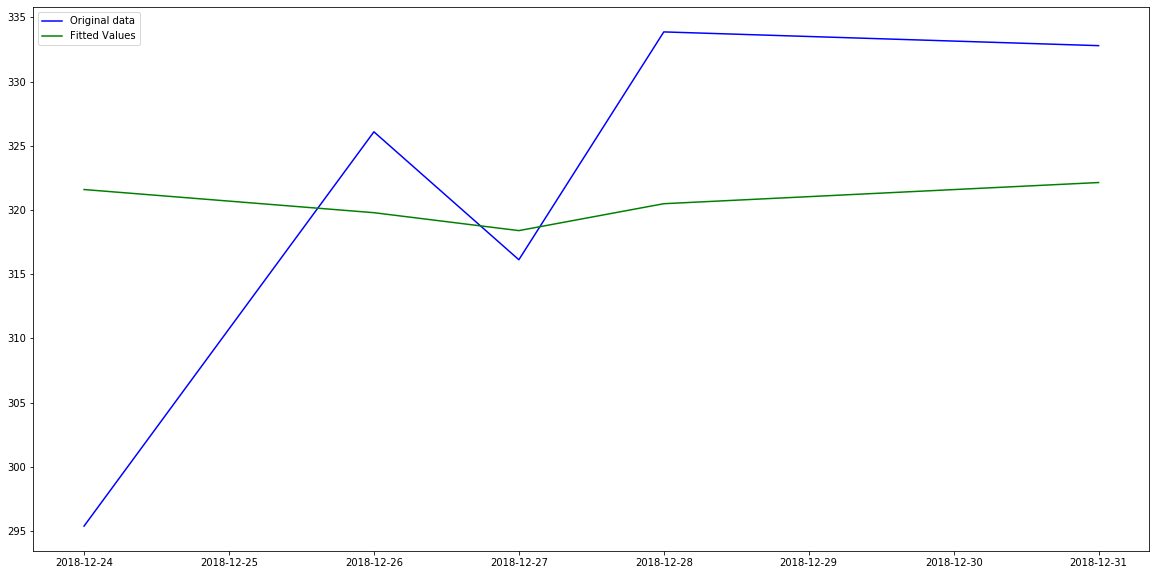

In [60]:
plt.figure(figsize=(20,10))
plt.plot(test_df, color='blue', label='Original data')
plt.plot(future_forecast, color='green', label='Fitted Values')
plt.legend()

In [0]:
future_forecast['Actual'] = test_df['Close']
future_forecast['Residual_Squared'] = np.square(future_forecast['Actual']-future_forecast['Prediction'])
future_forecast

,Prediction,Actual,Residual_Squared
Date,,,
2018-12-24,321.596426,295.390015,686.775995
2018-12-26,319.793546,326.089996,39.645286
2018-12-27,318.398007,316.130005,5.143832
2018-12-28,320.492734,333.869995,178.951123
2018-12-31,322.141497,332.799988,113.603436


In [61]:
residuals_df_final = stepwise_model.resid()
len(residuals_df_final)

1253

In [62]:
residuals_df_final

array([149.92999133,  -0.70996359,  -2.7353605 , ...,  -2.13419589,
       -15.45786154,   2.12515024])

In [63]:
sm.stats.acorr_ljungbox(residuals_df_final, lags=[24])

(array([15.63439778]), array([0.90081817]))

In [64]:
sm.stats.acorr_ljungbox(np.square(residuals_df_final), lags=[24])

(array([0.78874374]), array([1.]))

In [0]:
h=[]
for i in test_index:
    stepwise_model.fit(train)
    future_pred = stepwise_model.predict(n_periods=1)
    train = df_final.loc[:i] 
    
    h.append(future_pred[0])


# Just Testing Start

In [0]:
stepwise_model.fit(train_real)

ARIMA(callback=None, disp=0, maxiter=None, method=None, order=(0, 1, 0),
      out_of_sample_size=0, scoring='mse', scoring_args={},
      seasonal_order=(0, 1, 1, 12), solver='lbfgs', start_params=None,
      suppress_warnings=True, transparams=True, trend=None,
      with_intercept=True)

In [0]:
stepwise_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                 1259
Model:             SARIMAX(0, 1, 0)x(0, 1, 1, 12)   Log Likelihood               -4328.000
Date:                            Wed, 23 Oct 2019   AIC                           8662.000
Time:                                    22:51:24   BIC                           8677.383
Sample:                                         0   HQIC                          8667.784
                                           - 1259                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0021      0.006     -0.341      0.733      -0.014       0.010
ma.S.L12      -0.9995      0.323     -3.093      0.002      -1.633      -0.366
sigma2        58.2510     18.479      3.152      0.002      22.032      94.470
===================================================================================
Ljung-Box (Q):                       48.54   Jarque-Bera (JB):              1734.75
Prob(Q):                              0.17   Prob(JB):                         0.00
Heteroskedasticity (H):               3.02   Skew:                            -0.00
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.78
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [0]:
stepwise_model = auto_arima(df_final, start_p=0, start_q=0,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model.aic())

Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 1, 12); AIC=8662.000, BIC=8677.383, Fit time=3.632 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=9485.834, BIC=9496.089, Fit time=0.215 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=9145.109, BIC=9165.620, Fit time=2.412 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=8662.834, BIC=8683.345, Fit time=7.535 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 1, 1, 12); AIC=8663.823, BIC=8684.334, Fit time=5.936 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 2, 12); AIC=8663.810, BIC=8684.321, Fit time=16.638 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 1, 2, 12); AIC=8665.466, BIC=8691.104, Fit time=14.801 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 1, 1, 12); AIC=8662.806, BIC=8683.316, Fit time=6.492 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=8664.657, BIC=8690.295, Fit time=7.100 seconds
Total fit time: 64.765 sec

In [0]:
stepwise_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                 1258
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                2636.621
Date:                            Tue, 29 Oct 2019   AIC                          -5265.241
Time:                                    12:44:17   BIC                          -5244.734
Sample:                                         0   HQIC                         -5257.530
                                           - 1258                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -1.969e-06   1.18e-06     -1.664      0.096   -4.29e-06     3.5e-07
ma.L1         -0.9626      0.011    -91.201      0.000      -0.983      -0.942
ma.S.L12      -0.9783      0.012    -78.396      0.000      -1.003      -0.954
sigma2         0.0008   1.85e-05     42.109      0.000       0.001       0.001
===================================================================================
Ljung-Box (Q):                       47.78   Jarque-Bera (JB):               900.70
Prob(Q):                              0.19   Prob(JB):                         0.00
Heteroskedasticity (H):               1.76   Skew:                            -0.01
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.17
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# Just Testing End

# Logged Difference Forecast

In [0]:
# Log differenced return model train test split

train_log_diff = log_returns_diff.loc[:'2018-12-21']
test_index = log_returns_diff.loc['2018-12-24':].index.values
test = df_final.loc['2018-12-24':]

In [93]:
test

Date
2018-12-24    295.390015
2018-12-26    326.089996
2018-12-27    316.130005
2018-12-28    333.869995
2018-12-31    332.799988
Name: Close, dtype: float64

In [66]:
t_1 = df_final.loc['2018-12-21':'2018-12-30']
t_1

Date
2018-12-21    319.769989
2018-12-24    295.390015
2018-12-26    326.089996
2018-12-27    316.130005
2018-12-28    333.869995
Name: Close, dtype: float64

In [67]:
stepwise_model_log_diff = auto_arima(train_log_diff, start_p=0, start_q=0,
                           max_p=3, max_q=3,max_P=5, max_Q=5,
                           start_P=0, seasonal=True,
                           trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model_log_diff .aic())

Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-5415.616, BIC=-5405.351, Fit time=0.164 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-5413.625, BIC=-5398.228, Fit time=0.236 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-5413.625, BIC=-5398.227, Fit time=0.223 seconds
Fit ARIMA: order=(1, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-5411.563, BIC=-5391.033, Fit time=0.111 seconds
Total fit time: 0.739 seconds
-5415.615886767085


In [68]:
stepwise_model_log_diff.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 1252
Model:                        SARIMAX   Log Likelihood                2709.808
Date:                Tue, 19 Nov 2019   AIC                          -5415.616
Time:                        06:30:23   BIC                          -5405.351
Sample:                             0   HQIC                         -5411.757
                               - 1252                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0006      0.001      0.766      0.444      -0.001       0.002
sigma2         0.0008   1.75e-05     44.065      0.000       0.001       0.001
===================================================================================
Ljung-Box (Q):                       35.85   Jarque-Bera (JB):               956.71
Prob(Q):                              0.66   Prob(JB):                         0.00
Heteroskedasticity (H):               1.24   Skew:                             0.23
Prob(H) (two-sided):                  0.03   Kurtosis:                         7.26
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [0]:
residuals_log_diff = stepwise_model_log_diff.resid()
residuals_log_diff_square = np.square(residuals_log_diff)

In [70]:
residuals_log_diff

array([-0.00420822, -0.01786912,  0.01532285, ..., -0.01272362,
       -0.0548782 ,  0.0132196 ])

In [71]:
train_log_diff

Date
2014-01-03   -0.003604
2014-01-06   -0.017265
2014-01-07    0.015927
2014-01-08    0.012773
2014-01-09   -0.025101
                ...   
2018-12-17   -0.048432
2018-12-18   -0.033237
2018-12-19   -0.012120
2018-12-20   -0.054274
2018-12-21    0.013824
Name: Close, Length: 1252, dtype: float64

In [72]:
T_1 = pd.DataFrame(train_real[0:1252])
T_1

,Close
Date,
2014-01-02,150.100006
2014-01-03,149.559998
2014-01-06,147.000000
2014-01-07,149.360001
2014-01-08,151.279999
...,...
2018-12-14,365.709991
2018-12-17,348.420013
2018-12-18,337.029999


In [104]:
sm.stats.acorr_ljungbox((train_log_diff),lags = [1])

(array([0.00942556]), array([0.92265862]))

In [103]:
sm.stats.acorr_ljungbox(np.square(train_log_diff),lags = [26])

(array([75.88060327]), array([2.71914147e-07]))

In [75]:
sm.stats.acorr_ljungbox((residuals_log_diff),lags = [24])

(array([17.02101963]), array([0.84776417]))

In [76]:
sm.stats.acorr_ljungbox(np.square(residuals_log_diff),lags = [12])

(array([54.21226916]), array([2.5041539e-07]))

 -

**Using residuals from Auto Arima and parsing it onto the Auto Arima Function**

 -

In [77]:
stepwise_model_residual_sqr = auto_arima(residuals_log_diff_square, start_p=0, start_q=0,
                           max_p=3, max_q=3,max_P=5, max_Q=5,
                           start_P=0, seasonal=True,
                           trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model_log_diff .aic())

Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=-11408.975, BIC=-11398.712, Fit time=0.128 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=-11654.396, BIC=-11639.001, Fit time=0.180 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=-11941.173, BIC=-11925.778, Fit time=0.359 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=-11991.375, BIC=-11970.848, Fit time=0.409 seconds
Fit ARIMA: order=(1, 1, 2) seasonal_order=(0, 0, 0, 1); AIC=-12108.678, BIC=-12083.020, Fit time=2.511 seconds
Fit ARIMA: order=(2, 1, 3) seasonal_order=(0, 0, 0, 1); AIC=-12037.458, BIC=-12001.536, Fit time=2.780 seconds
Fit ARIMA: order=(0, 1, 2) seasonal_order=(0, 0, 0, 1); AIC=-12056.394, BIC=-12035.868, Fit time=0.600 seconds
Fit ARIMA: order=(2, 1, 2) seasonal_order=(0, 0, 0, 1); AIC=-12111.761, BIC=-12080.970, Fit time=1.546 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=-11946.742, BIC=-11921.084, Fit time=0.802 seconds
F

In [78]:
stepwise_model_residual_sqr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 1252
Model:               SARIMAX(2, 1, 2)   Log Likelihood                6061.880
Date:                Tue, 19 Nov 2019   AIC                         -12111.761
Time:                        06:32:42   BIC                         -12080.970
Sample:                             0   HQIC                        -12100.186
                               - 1252                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   -5.41e-06   6.26e-06     -0.864      0.387   -1.77e-05    6.86e-06
ar.L1         -0.7173      0.100     -7.162      0.000      -0.914      -0.521
ar.L2          0.0846      0.027      3.165      0.002       0.032       0.137
ma.L1         -0.0994      0.100     -0.996      0.319      -0.295       0.096
ma.L2         -0.8440      0.097     -8.720      0.000      -1.034      -0.654
sigma2      3.554e-06   4.49e-08     79.125      0.000    3.47e-06    3.64e-06
===================================================================================
Ljung-Box (Q):                       68.86   Jarque-Bera (JB):            163643.05
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.59   Skew:                             6.14
Prob(H) (two-sided):                  0.00   Kurtosis:                        57.67
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [79]:
future_forecast = stepwise_model_residual_sqr.predict(n_periods=5)
future_forecast

array([0.0009108 , 0.001223  , 0.0010559 , 0.00119678, 0.00107618])

In [80]:
future_forecast = pd.DataFrame(np.sqrt(future_forecast),index = test.index,columns=['Epsilon_forecast'])

future_forecast.head()

future_forecast.index = pd.to_datetime(future_forecast.index, format="%Y/%m/%d")

type(future_forecast)

pandas.core.frame.DataFrame

In [81]:
test_df = test.to_frame().reset_index()

test_df.set_index('Date', inplace=True)

test_df.index = pd.to_datetime(test_df.index, format="%Y/%m/%d")

#future_forecast.index = pd.to_datetime(future_forecast.index, format="%Y/%m/%d")

type(test_df)

pandas.core.frame.DataFrame

In [82]:
future_forecast

,Epsilon_forecast
Date,
2018-12-24,0.030179
2018-12-26,0.034971
2018-12-27,0.032495
2018-12-28,0.034594
2018-12-31,0.032805


In [0]:
a = np.random.normal(0,1,5)
a

array([-0.82046124,  2.48068311,  1.31229476,  0.24801744, -0.47064205])

In [0]:
future_forecast['Actual'] = test_df['Close']
t_1 = df_final.loc['2018-12-21':'2018-12-30']
future_forecast['T-1'] = t_1.values
future_forecast['Random_a'] = np.sign(a)
future_forecast['True_Epsilon_forecast'] = np.exp(future_forecast['Epsilon_forecast']*future_forecast['Random_a'])
future_forecast['Prediction'] = future_forecast['True_Epsilon_forecast']*future_forecast['T-1']

In [0]:
future_forecast

,Epsilon_forecast,Actual,T-1,Random_a,True_Epsilon_forecast,Prediction
Date,,,,,,
2018-12-24,0.030179,295.390015,319.769989,-1.0,0.970271,310.263684
2018-12-26,0.034971,326.089996,295.390015,1.0,1.035590,305.902999
2018-12-27,0.032495,316.130005,326.089996,1.0,1.033028,336.860229
2018-12-28,0.034594,333.869995,316.130005,-1.0,0.965997,305.380662
2018-12-31,0.032805,332.799988,333.869995,-1.0,0.967727,323.095050


In [0]:
for i in range(1,future_forecast.shape[0]):
  
     future_forecast['Prediction'].iloc[i] = future_forecast['True_Epsilon_forecast'].iloc[i] * future_forecast['Prediction'].iloc[i-1]

In [0]:
future_forecast

,Epsilon_forecast,Actual,T-1,Random_a,True_Epsilon_forecast,Prediction
Date,,,,,,
2018-12-24,0.030179,295.390015,319.769989,-1.0,0.970271,310.263684
2018-12-26,0.034971,326.089996,295.390015,1.0,1.035590,321.306024
2018-12-27,0.032495,316.130005,326.089996,1.0,1.033028,331.918250
2018-12-28,0.034594,333.869995,316.130005,1.0,1.035200,343.601712
2018-12-31,0.032805,332.799988,333.869995,-1.0,0.967727,332.512696


In [0]:
future_forecast = future_forecast['Prediction']

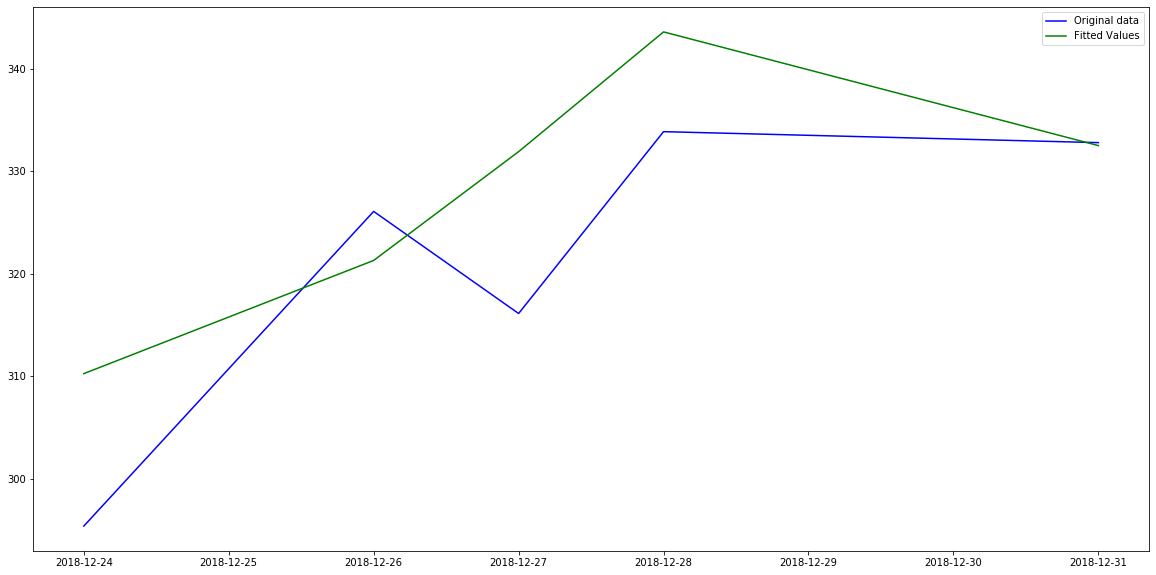

In [0]:
plt.figure(figsize=(20,10))
plt.plot(test_df, color='blue', label='Original data')
plt.plot(future_forecast, color='green', label='Fitted Values')
plt.legend()

-

**Using Log(yt/yt-1) as the residuals and parsing it onto auto arima function**

In [92]:
df_acf = acf(np.square(train_log_diff))
df_pacf = pacf(np.square(train_log_diff))

import statsmodels.api as sm
fig1 = plt.figure(figsize=(20,10))
ax1 = fig1.add_subplot(211)
fig1 = sm.graphics.tsa.plot_acf(df_acf, ax=ax1)
ax2 = fig1.add_subplot(212)
fig1 = sm.graphics.tsa.plot_pacf(df_pacf, ax=ax2)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


In [0]:
res_square_log_diff = np.square(train_log_diff)
diff_res_square_log_diff = res_square_log_diff - res_square_log_diff.shift(1)
diff_res_square_log_diff.dropna(inplace = True)


Dickey-Fuller Test results

ADF Test Statistic   -1.341818e+01
ADF p-value           4.241109e-25
# of lags             1.900000e+01
# of obs              1.231000e+03
dtype: float64
Critical value at 1%: -3.43567
Critical value at 5%: -2.86389
Critical value at 10%: -2.56802


KPSS Test Results

KPSS Test Statistic    0.0106865
KPSS p-value KPSS            0.1
# of lags                     23
dtype: object
Critical value at 10%: 0.34700
Critical value at 5%: 0.46300
Critical value at 2.5%: 0.57400
Critical value at 1%: 0.73900


     Phillips-Perron Test (Z-tau)    
Test Statistic               -147.759
P-value                         0.000
Lags                               23
-------------------------------------

Trend: Constant
Critical Values: -3.44 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1710: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


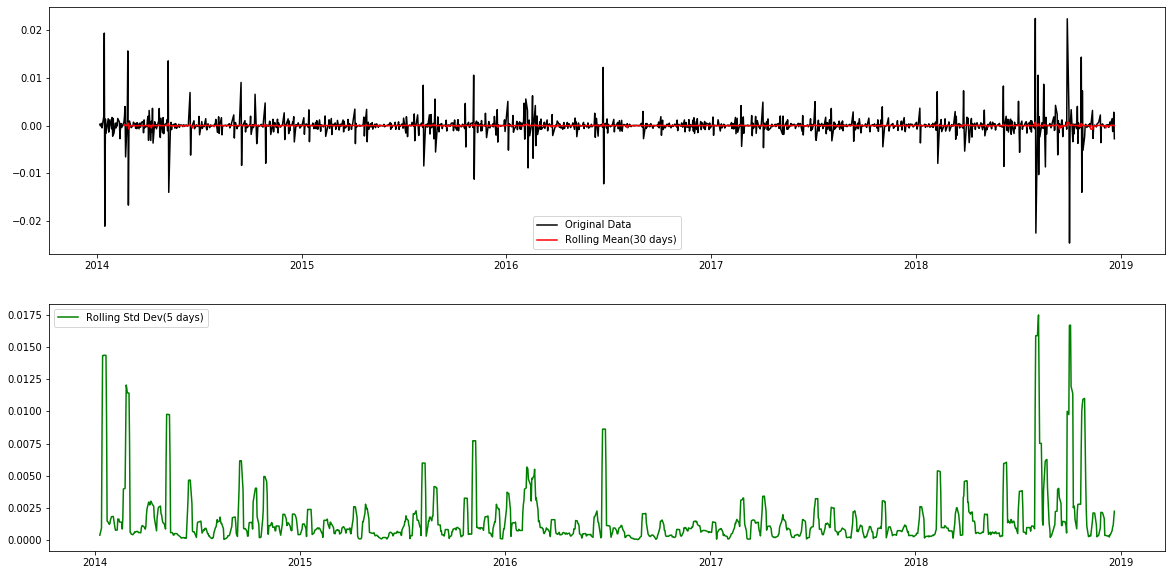

In [97]:
check_stationarity(diff_res_square_log_diff)

Dickey-Fuller Test results

ADF Test Statistic   -1.747756e+01
ADF p-value           4.507657e-30
# of lags             2.000000e+00
# of obs              1.249000e+03
dtype: float64
Critical value at 1%: -3.43560
Critical value at 5%: -2.86386
Critical value at 10%: -2.56800


KPSS Test Results

KPSS Test Statistic     0.425357
KPSS p-value KPSS      0.0662254
# of lags                     23
dtype: object
Critical value at 10%: 0.34700
Critical value at 5%: 0.46300
Critical value at 2.5%: 0.57400
Critical value at 1%: 0.73900


     Phillips-Perron Test (Z-tau)    
Test Statistic                -32.099
P-value                         0.000
Lags                               23
-------------------------------------

Trend: Constant
Critical Values: -3.44 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)


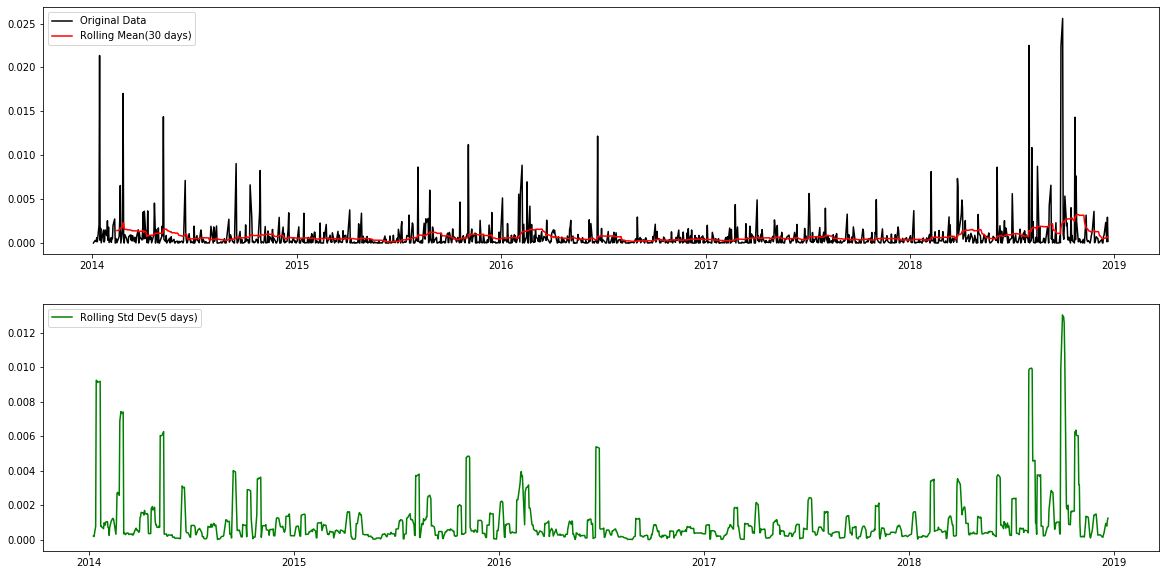

In [106]:
check_stationarity(np.square(train_log_diff))

In [98]:
stepwise_model_resid_square_diff = auto_arima(diff_res_square_log_diff, start_p=0, start_q=0,
                           max_p=3, max_q=3,max_P=5, max_Q=5,
                           start_P=0, seasonal=True,
                           trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model_resid_square .aic())

Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-11401.537, BIC=-11391.274, Fit time=0.190 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-11648.686, BIC=-11633.291, Fit time=0.501 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-11936.914, BIC=-11921.519, Fit time=0.281 seconds
Fit ARIMA: order=(1, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-12100.267, BIC=-12079.741, Fit time=1.396 seconds
Fit ARIMA: order=(1, 0, 2) seasonal_order=(0, 0, 0, 1); AIC=-12101.426, BIC=-12075.767, Fit time=1.017 seconds
Fit ARIMA: order=(2, 0, 3) seasonal_order=(0, 0, 0, 1); AIC=-12032.090, BIC=-11996.168, Fit time=1.530 seconds
Fit ARIMA: order=(0, 0, 2) seasonal_order=(0, 0, 0, 1); AIC=-12051.149, BIC=-12030.623, Fit time=1.451 seconds
Fit ARIMA: order=(2, 0, 2) seasonal_order=(0, 0, 0, 1); AIC=-12038.607, BIC=-12007.817, Fit time=1.699 seconds
Fit ARIMA: order=(1, 0, 3) seasonal_order=(0, 0, 0, 1); AIC=-12081.287, BIC=-12050.497, Fit time=2.923 seconds
T

In [100]:
stepwise_model_resid_square_diff.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 1251
Model:               SARIMAX(1, 0, 2)   Log Likelihood                6055.713
Date:                Tue, 19 Nov 2019   AIC                         -12101.426
Time:                        07:16:28   BIC                         -12075.767
Sample:                             0   HQIC                        -12091.780
                               - 1251                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -5.134e-06   7.29e-06     -0.704      0.481   -1.94e-05    9.16e-06
ar.L1         -0.7898      0.032    -24.759      0.000      -0.852      -0.727
ma.L1         -0.0611      0.030     -2.010      0.044      -0.121      -0.002
ma.L2         -0.8693      0.025    -34.234      0.000      -0.919      -0.820
sigma2      3.619e-06   4.69e-08     77.136      0.000    3.53e-06    3.71e-06
===================================================================================
Ljung-Box (Q):                       79.27   Jarque-Bera (JB):            168504.36
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.59   Skew:                             6.15
Prob(H) (two-sided):                  0.00   Kurtosis:                        58.51
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [101]:
stepwise_model_resid_square = auto_arima(np.square(train_log_diff), start_p=0, start_q=0,
                           max_p=3, max_q=3,max_P=5, max_Q=5,
                           start_P=0, seasonal=True,
                           trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model_resid_square .aic())

Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=-11401.537, BIC=-11391.274, Fit time=0.192 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=-11648.686, BIC=-11633.291, Fit time=0.175 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=-11936.914, BIC=-11921.519, Fit time=0.411 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=-12015.696, BIC=-11995.170, Fit time=0.498 seconds
Fit ARIMA: order=(1, 1, 2) seasonal_order=(0, 0, 0, 1); AIC=-12103.145, BIC=-12077.486, Fit time=2.492 seconds
Fit ARIMA: order=(2, 1, 3) seasonal_order=(0, 0, 0, 1); AIC=-12032.090, BIC=-11996.168, Fit time=2.803 seconds
Fit ARIMA: order=(0, 1, 2) seasonal_order=(0, 0, 0, 1); AIC=-12051.149, BIC=-12030.623, Fit time=0.892 seconds
Fit ARIMA: order=(2, 1, 2) seasonal_order=(0, 0, 0, 1); AIC=-12111.246, BIC=-12080.456, Fit time=3.792 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=-11940.982, BIC=-11915.324, Fit time=0.804 seconds
F

In [102]:
stepwise_model_resid_square.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 1252
Model:               SARIMAX(2, 1, 2)   Log Likelihood                6061.623
Date:                Tue, 19 Nov 2019   AIC                         -12111.246
Time:                        07:17:42   BIC                         -12080.456
Sample:                             0   HQIC                        -12099.672
                               - 1252                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -2.317e-06    5.6e-06     -0.414      0.679   -1.33e-05    8.66e-06
ar.L1         -0.7458      0.075     -9.882      0.000      -0.894      -0.598
ar.L2          0.0519      0.022      2.338      0.019       0.008       0.095
ma.L1         -0.0960      0.075     -1.282      0.200      -0.243       0.051
ma.L2         -0.8488      0.072    -11.711      0.000      -0.991      -0.707
sigma2      3.515e-06   4.38e-08     80.346      0.000    3.43e-06     3.6e-06
===================================================================================
Ljung-Box (Q):                       66.16   Jarque-Bera (JB):            173529.43
Prob(Q):                              0.01   Prob(JB):                         0.00
Heteroskedasticity (H):               1.60   Skew:                             6.27
Prob(H) (two-sided):                  0.00   Kurtosis:                        59.32
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [0]:
future_forecast = stepwise_model_resid_square.predict(n_periods=5)
future_forecast

array([0.00098819, 0.00133162, 0.0011145 , 0.00129193, 0.00114602])

In [0]:
future_forecast = pd.DataFrame(np.sqrt(future_forecast),index = test.index,columns=['Epsilon_forecast'])

future_forecast.head()

future_forecast.index = pd.to_datetime(future_forecast.index, format="%Y/%m/%d")

type(future_forecast)

pandas.core.frame.DataFrame

In [0]:
test_df = test.to_frame().reset_index()

test_df.set_index('Date', inplace=True)

test_df.index = pd.to_datetime(test_df.index, format="%Y/%m/%d")

#future_forecast.index = pd.to_datetime(future_forecast.index, format="%Y/%m/%d")

type(test_df)

pandas.core.frame.DataFrame

In [0]:
future_forecast

,Epsilon_forecast
Date,
2018-12-24,0.031435
2018-12-26,0.036491
2018-12-27,0.033384
2018-12-28,0.035943
2018-12-31,0.033853


In [0]:
a = np.random.normal(0,1, )
a

array([-0.69647215,  1.03463018, -0.96521204,  0.21095182,  0.70035096])

In [0]:
future_forecast['Actual'] = test_df['Close']
t_1 = df_final.loc['2018-12-21':'2018-12-30']
future_forecast['T-1'] = t_1.values
future_forecast['Random_a'] = np.sign(a)
future_forecast['True_Epsilon_forecast'] = np.exp(future_forecast['Epsilon_forecast']*future_forecast['Random_a'])
future_forecast['Prediction'] = future_forecast['True_Epsilon_forecast']*future_forecast['T-1']

In [0]:
future_forecast

,Epsilon_forecast,Actual,T-1,Random_a,True_Epsilon_forecast,Prediction
Date,,,,,,
2018-12-24,0.031435,295.390015,319.769989,-1.0,0.969053,309.874216
2018-12-26,0.036491,326.089996,295.390015,1.0,1.037165,306.368284
2018-12-27,0.033384,316.130005,326.089996,-1.0,0.967167,315.383456
2018-12-28,0.035943,333.869995,316.130005,1.0,1.036597,327.699494
2018-12-31,0.033853,332.799988,333.869995,1.0,1.034432,345.365963


In [0]:
for i in range(1,future_forecast.shape[0]):
  
     future_forecast['Prediction'].iloc[i] = future_forecast['True_Epsilon_forecast'].iloc[i] * future_forecast['Prediction'].iloc[i-1]

In [0]:
future_forecast

,Epsilon_forecast,Actual,T-1,Random_a,True_Epsilon_forecast,Prediction
Date,,,,,,
2018-12-24,0.031435,295.390015,319.769989,-1.0,0.969053,309.874216
2018-12-26,0.036491,326.089996,295.390015,1.0,1.037165,321.390796
2018-12-27,0.033384,316.130005,326.089996,-1.0,0.967167,310.838545
2018-12-28,0.035943,333.869995,316.130005,1.0,1.036597,322.214382
2018-12-31,0.033853,332.799988,333.869995,1.0,1.034432,333.309018


In [0]:
future_forecast = future_forecast['Prediction']

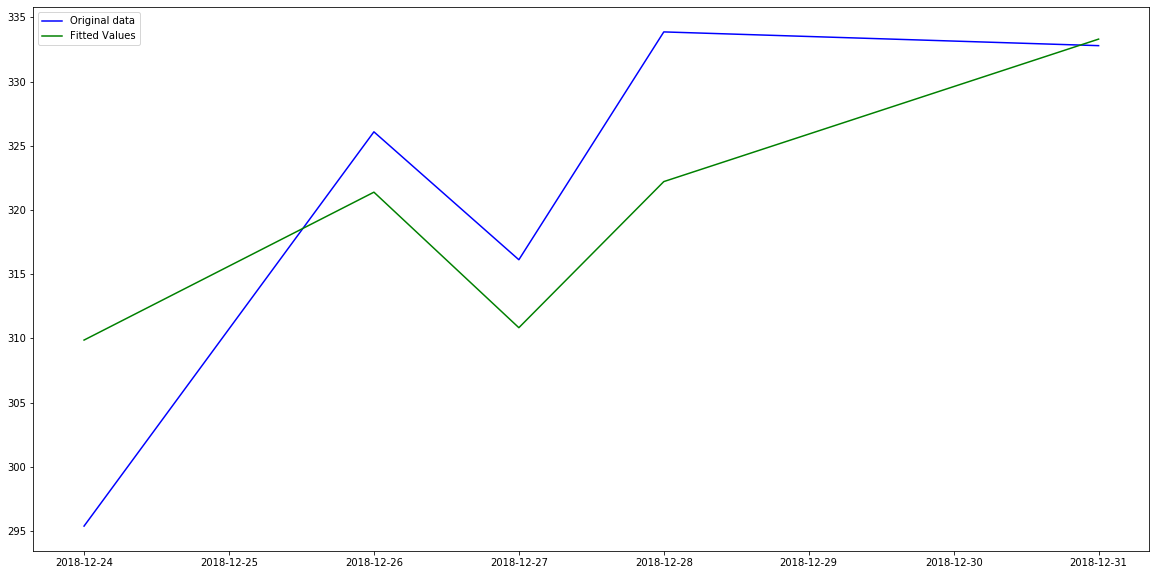

In [0]:
plt.figure(figsize=(20,10))
plt.plot(test_df, color='blue', label='Original data')
plt.plot(future_forecast, color='green', label='Fitted Values')
plt.legend()

In [0]:
h=[]
for i in test_index:
    train = log_returns_diff.loc[:i]
    stepwise_model.fit(train)
    future_pred = stepwise_model.predict(n_periods=1)
    h.append(future_pred[0])



    

# Log_diff  End

# Plotting and Testing - To be used when we dont have a ARIMA 000 Model

In [0]:
from scipy import stats

def rsquared(x, y):
    """ Return R^2 where x and y are array-like."""

    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    return r_value**2

In [0]:
rsquared(future_forecast, test)

0.0005306864488755609

In [0]:
rsquared(h, test)

NameError: ignored

In [0]:
from sklearn.metrics import r2_score
r2_score(h, test)

0.6093715869976987

In [0]:
future_forecast = pd.DataFrame(future_forecast,index = test.index,columns=['Prediction_log'])

future_forecast.head()

future_forecast.index = pd.to_datetime(future_forecast.index, format="%Y/%m/%d")

type(future_forecast)

pandas.core.frame.DataFrame

In [0]:
future_forecast


,Prediction_log
Date,
2018-12-24,321.596426
2018-12-26,319.793546
2018-12-27,318.398007
2018-12-28,320.492734
2018-12-31,322.141497


In [0]:
future_forecast['T-1 Values'] = t_1.values
future_forecast

,Prediction_log,T-1 Values
Date,,
2018-12-24,321.596426,319.769989
2018-12-26,319.793546,295.390015
2018-12-27,318.398007,326.089996
2018-12-28,320.492734,316.130005
2018-12-31,322.141497,333.869995


In [0]:
test

Date
2018-12-24    295.390015
2018-12-26    326.089996
2018-12-27    316.130005
2018-12-28    333.869995
2018-12-31    332.799988
Name: Close, dtype: float64

In [0]:
future_forecast['exp'] = np.exp(future_forecast['Prediction_log'])
future_forecast

,Prediction_log,T-1 Values,exp
Date,,,
2018-12-24,321.596426,319.769989,4.651075e+139
2018-12-26,319.793546,295.390015,7.666061e+138
2018-12-27,318.398007,326.089996,1.898880e+138
2018-12-28,320.492734,316.130005,1.542502e+139
2018-12-31,322.141497,333.869995,8.021848e+139


In [0]:
future_forecast['Prediction'] = future_forecast['T-1 Values']*future_forecast['exp']
future_forecast

,Prediction_log,T-1 Values,exp,Prediction
Date,,,,
2018-12-24,321.596426,319.769989,4.651075e+139,1.487274e+142
2018-12-26,319.793546,295.390015,7.666061e+138,2.264478e+141
2018-12-27,318.398007,326.089996,1.898880e+138,6.192056e+140
2018-12-28,320.492734,316.130005,1.542502e+139,4.876311e+141
2018-12-31,322.141497,333.869995,8.021848e+139,2.678254e+142


In [0]:
future_forecast=future_forecast[['Prediction']]

In [0]:
future_forecast

,Prediction
Date,
2018-12-24,1.487274e+142
2018-12-26,2.264478e+141
2018-12-27,6.192056e+140
2018-12-28,4.876311e+141
2018-12-31,2.678254e+142


In [0]:
h = pd.DataFrame(h, index = test.index, columns =['Prediction'])
h.head()
h.index = pd.to_datetime(future_forecast.index,format = "%Y/%m/%d")

In [0]:
h

,Prediction
Date,
2019-07-22,258.923049
2019-07-23,255.325266
2019-07-24,260.117212
2019-07-25,263.877649
2019-07-26,229.439324
2019-07-29,227.797821
2019-07-30,235.669022
2019-07-31,241.803435
2019-08-01,240.812220


In [0]:
test_df = test.to_frame().reset_index()

test_df.set_index('Date', inplace=True)

test_df.index = pd.to_datetime(test_df.index, format="%Y/%m/%d")

#future_forecast.index = pd.to_datetime(future_forecast.index, format="%Y/%m/%d")

type(test_df)

pandas.core.frame.DataFrame

In [0]:
test_df

,Close
Date,
2018-12-24,295.390015
2018-12-26,326.089996
2018-12-27,316.130005
2018-12-28,333.869995
2018-12-31,332.799988


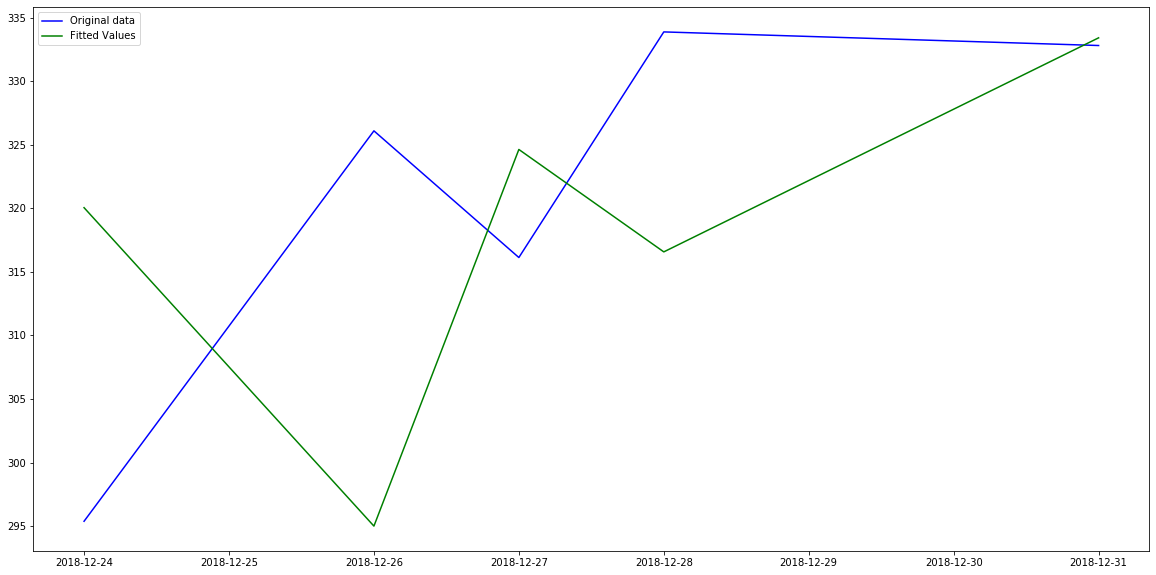

In [0]:
plt.figure(figsize=(20,10))
plt.plot(test_df, color='blue', label='Original data')
plt.plot(future_forecast, color='green', label='Fitted Values')
plt.legend()

In [0]:
residuals_log_diff = stepwise_model.resid()
len(residuals_log_diff)

1252

In [0]:
residuals_log_diff 

array([-0.00358525, -0.01724616,  0.01594581, ..., -0.01823768,
       -0.05604213,  0.01182333])

In [0]:
sm.stats.acorr_ljungbox(residuals_log_diff, lags=[24])

(array([17.40775081]), array([0.83075842]))

In [0]:
sm.stats.acorr_ljungbox(np.square(residuals_log_diff),lags = [12])

(array([132.02096795]), array([2.42403818e-22]))

In [0]:
T_1 = pd.DataFrame(train_real[1:1253])


In [0]:
train_log_diff

Date
2014-01-03   -0.003604
2014-01-06   -0.017265
2014-01-07    0.015927
2014-01-08    0.012773
2014-01-09   -0.025101
                ...   
2018-12-17   -0.048432
2018-12-18   -0.033237
2018-12-19   -0.012120
2018-12-20   -0.054274
2018-12-21    0.013824
Name: Close, Length: 1252, dtype: float64

In [0]:

residuals_df = pd.DataFrame(residuals_log_diff,index = T_1.index,columns = ['Residual_log_diff'])
#residuals_df['Residual_log_diff'] = residuals_log_diff
residuals_df['Actual'] = train_real[1:1253].values
residuals_df['exp'] = np.exp(residuals_df['Residual_log_diff'])
residuals_df['Forecast_Actual'] = residuals_df['exp']*residuals_df['Actual']
residuals_df['Residual_True'] = residuals_df['Forecast_Actual'] - residuals_df['Actual']

In [0]:
residuals_df

,Residual_log_diff,Actual,exp,Forecast_Actual,Residual_True
Date,,,,,
2014-01-03,-0.003585,149.559998,0.996421,149.024747,-0.535251
2014-01-06,-0.017246,147.000000,0.982902,144.486550,-2.513450
2014-01-07,0.015946,149.360001,1.016074,151.760757,2.400756
2014-01-08,0.012792,151.279999,1.012874,153.227572,1.947573
2014-01-09,-0.025082,147.529999,0.975230,143.875673,-3.654326
...,...,...,...,...,...
2018-12-17,-0.046317,348.420013,0.954739,332.650283,-15.769730
2018-12-18,-0.028861,337.029999,0.971552,327.442019,-9.587980
2018-12-19,-0.018238,332.970001,0.981928,326.952441,-6.017560


In [0]:
sm.stats.acorr_ljungbox(residuals_df['Residual_True'], lags=[24])

(array([23.96695352]), array([0.46348836]))

In [0]:
sm.stats.acorr_ljungbox(np.square(residuals_df['Residual_True']), lags=[24])

(array([148.46712182]), array([6.37856394e-20]))

In [0]:
future_forecast['Actual'] = test_df['Close']
future_forecast['Residual_Squared'] = np.square(future_forecast['Actual']-future_forecast['Prediction'])
future_forecast

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Prediction,Actual,Residual_Squared
Date,,,
2019-10-07,231.241495,237.720001,41.971046
2019-10-08,237.269321,240.050003,7.732191
2019-10-09,239.305875,244.529999,27.291471
2019-10-10,243.390236,244.740005,1.821876
2019-10-11,245.054971,247.889999,8.037384
2019-10-14,248.768617,256.959991,67.098605


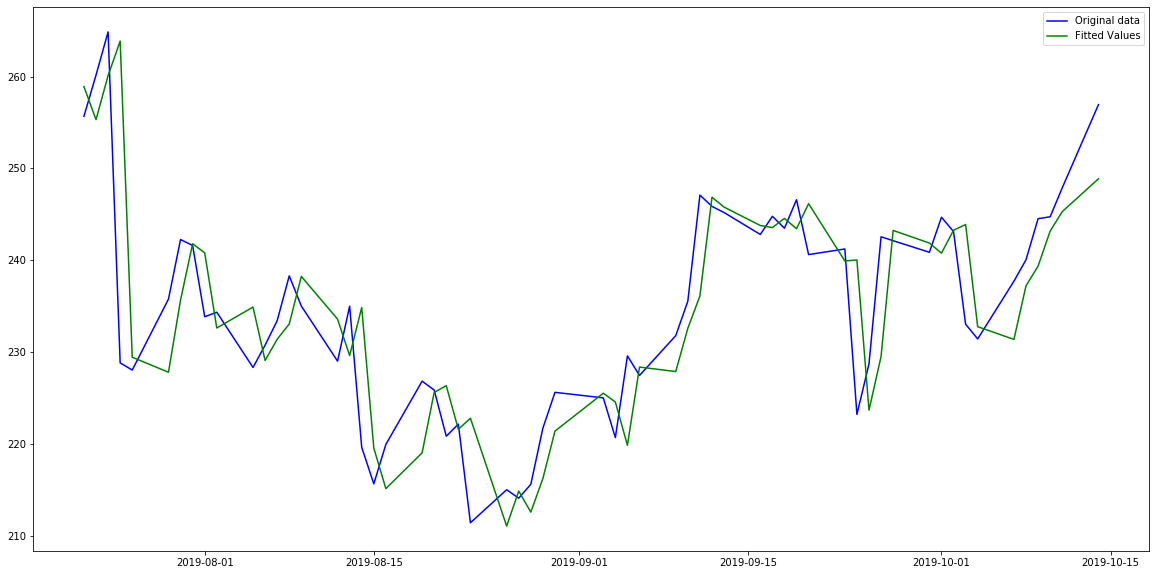

In [0]:
plt.figure(figsize=(20,10))
plt.plot(test_df, color='blue', label='Original data')
plt.plot(h, color='green', label='Fitted Values')
plt.legend()

In [0]:
h['Actual'] = test_df['Close']

In [0]:
h

,Prediction,Actual
Date,,
2019-07-22,258.923049,255.679993
2019-07-23,255.325266,260.170013
2019-07-24,260.117212,264.880005
2019-07-25,263.877649,228.820007
2019-07-26,229.439324,228.039993
2019-07-29,227.797821,235.770004
2019-07-30,235.669022,242.259995
2019-07-31,241.803435,241.610001
2019-08-01,240.812220,233.850006


# GARCH

In [0]:
from arch import arch_model

In [0]:
model = arch_model(train, mean='Zero',  p=1, q=1,o=1) #vol='GARCH',

In [0]:
res = model.fit(update_freq=5,disp='off')

print(model_fit.summary())

c:\users\supreme leader\envs\timeseries\lib\site-packages\arch\univariate\base.py:260: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0007705. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  DataScaleWarning)


                     Zero Mean - GJR-GARCH Model Results                      
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.001
Vol Model:                  GJR-GARCH   Log-Likelihood:                2637.63
Distribution:                  Normal   AIC:                          -5267.26
Method:            Maximum Likelihood   BIC:                          -5246.91
                                        No. Observations:                 1198
Date:                Wed, Oct 23 2019   Df Residuals:                     1194
Time:                        11:18:39   Df Model:                            4
                               Volatility Model                              
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega      1.5421e-05  1.598e-11  9.652e+05      0.000 

c:\users\supreme leader\envs\timeseries\lib\site-packages\arch\univariate\base.py:605: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning)


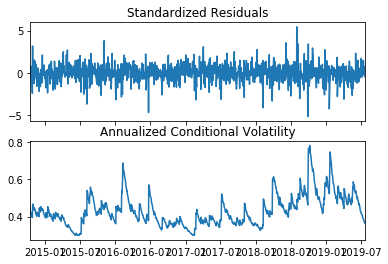

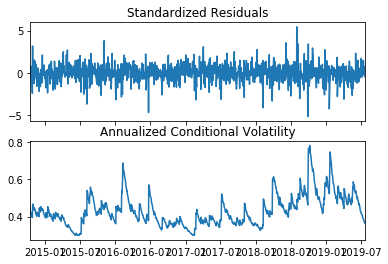

In [0]:
res.plot(annualize='D')

In [0]:
forecasts = res.forecast(horizon=5,start= '2014-10-15',method='simulation', simulations=100)

TypeError: forecast() got an unexpected keyword argument 'last_obs'

In [0]:
print(forecasts.residual_variance)


                 h.1       h.2       h.3       h.4       h.5
Date                                                        
2014-10-15  0.000735  0.000734  0.000745  0.000738  0.000740
2014-10-16  0.000723  0.000720  0.000721  0.000721  0.000717
2014-10-17  0.000699  0.000695  0.000690  0.000695  0.000696
2014-10-20  0.000677  0.000681  0.000681  0.000679  0.000683
2014-10-21  0.000660  0.000666  0.000674  0.000677  0.000686
...              ...       ...       ...       ...       ...
2019-07-15  0.000596  0.000602  0.000603  0.000612  0.000618
2019-07-16  0.000580  0.000586  0.000587  0.000587  0.000587
2019-07-17  0.000565  0.000562  0.000565  0.000570  0.000575
2019-07-18  0.000551  0.000559  0.000559  0.000562  0.000568
2019-07-19  0.000539  0.000547  0.000550  0.000554  0.000557

[1198 rows x 5 columns]


In [0]:
test

Date
2019-07-22   -0.009730
2019-07-23    0.017409
2019-07-24    0.017942
2019-07-25   -0.146341
2019-07-26   -0.003415
2019-07-29    0.033336
2019-07-30    0.027155
2019-07-31   -0.002687
2019-08-01   -0.032645
2019-08-02    0.002093
2019-08-05   -0.026025
2019-08-06    0.010587
2019-08-07    0.011505
2019-08-08    0.020691
2019-08-09   -0.013902
2019-08-12   -0.025862
2019-08-13    0.025820
2019-08-14   -0.067687
2019-08-15   -0.018288
2019-08-16    0.019744
2019-08-19    0.030846
2019-08-20   -0.004286
2019-08-21   -0.022522
2019-08-22    0.005960
2019-08-23   -0.049601
2019-08-26    0.016886
2019-08-27   -0.004288
2019-08-28    0.007029
2019-08-29    0.027992
2019-08-30    0.017438
2019-09-03   -0.002663
2019-09-04   -0.019431
2019-09-05    0.039538
2019-09-06   -0.009321
2019-09-09    0.018901
2019-09-10    0.016049
2019-09-11    0.047912
2019-09-12   -0.004990
2019-09-13   -0.002729
2019-09-16   -0.009795
2019-09-17    0.008121
2019-09-18   -0.005325
2019-09-19    0.012692
2019-0

In [0]:
sims = forecasts.simulations

In [0]:
(sims.values[1][1])

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan])

c:\users\supreme leader\envs\timeseries\lib\site-packages\matplotlib\axes\_axes.py:6735: RuntimeWarning: All-NaN slice encountered
  xmin = min(xmin, np.nanmin(xi))
c:\users\supreme leader\envs\timeseries\lib\site-packages\matplotlib\axes\_axes.py:6736: RuntimeWarning: All-NaN slice encountered
  xmax = max(xmax, np.nanmax(xi))


ValueError: autodetected range of [nan, nan] is not finite

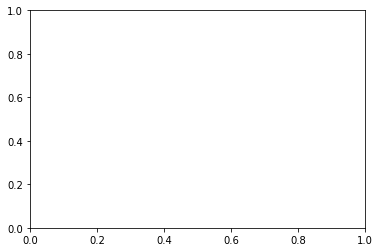

In [0]:
plt.hist(sims.values[-1, :,-1],bins=100)
plt.title('Distribution of Returns')
plt.show()

# Rough

In [0]:
def seasonal(dataset, interval):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return diff

In [0]:
data_deseasonal = seasonal(list(log_returns_diff), interval = 255)
len(data_deseasonal)

1002

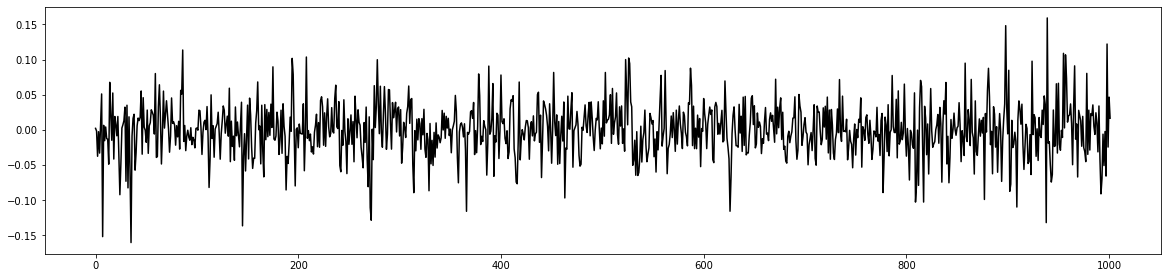

In [0]:
 
fig = plt.figure(figsize=(20,10))
plt.subplot(211)
plt.plot(data_deseasonal, color='black', label='Original Data')

In [0]:
data_deseasonal = pd.DataFrame(data_deseasonal,index = df_final.index,columns=['Close'])



ValueError: ignored

In [0]:
    print('Dickey-Fuller Test results\n')
    df_test_adf = adfuller(data_deseasonal, regresults=False)
    test_result = pd.Series(df_test_adf[0:4], index=['ADF Test Statistic','ADF p-value','# of lags','# of obs'])
    print(test_result)
    for k,v in df_test_adf[4].items():
        print('Critical value at %s: %1.5f' %(k,v))
    print('\n')   
    # KPSS Test - Null Hypothesis : The series is stationary
    df_test_kpss = kpss(data_deseasonal)
    test_result_kpss = pd.Series(df_test_kpss[0:4], index=['KPSS Test Statistic','KPSS p-value KPSS','# of lags','Significance Level : Test statistic values'])
    print('KPSS Test Results\n')
    print(test_result_kpss[0:3])
    for k,v in df_test_kpss[3].items():
        print('Critical value at %s: %1.5f' %(k,v))
    
    # PP Test
    
    X = PhillipsPerron(data_deseasonal, lags=None, trend='c', test_type='tau')
    print('\n')

Dickey-Fuller Test results

ADF Test Statistic     -29.59775
ADF p-value              0.00000
# of lags                0.00000
# of obs              1001.00000
dtype: float64
Critical value at 1%: -3.43690
Critical value at 5%: -2.86443
Critical value at 10%: -2.56831


KPSS Test Results

KPSS Test Statistic    0.0566253
KPSS p-value KPSS            0.1
# of lags                     22
dtype: object
Critical value at 10%: 0.34700
Critical value at 5%: 0.46300
Critical value at 2.5%: 0.57400
Critical value at 1%: 0.73900




/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1710: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


In [0]:
stepwise_model = auto_arima(data_deseasonal, start_p=0, start_q=0,
                           max_p=3, max_q=3,m=7,
                           start_P=0, seasonal=True,
                           trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model.aic())

Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 1, 7); AIC=-3720.577, BIC=-3705.848, Fit time=0.550 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 7); AIC=-3721.978, BIC=-3712.158, Fit time=0.195 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(1, 0, 0, 7); AIC=-3723.113, BIC=-3703.474, Fit time=0.271 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 1, 7); AIC=-3722.807, BIC=-3703.168, Fit time=1.507 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 0, 7); AIC=-3724.279, BIC=-3709.550, Fit time=0.217 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 1, 7); AIC=-3723.099, BIC=-3703.460, Fit time=0.710 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(1, 0, 1, 7); AIC=-3721.275, BIC=-3696.726, Fit time=1.601 seconds
Fit ARIMA: order=(2, 0, 0) seasonal_order=(0, 0, 0, 7); AIC=-3723.401, BIC=-3703.762, Fit time=0.308 seconds
Fit ARIMA: order=(1, 0, 1) seasonal_order=(0, 0, 0, 7); AIC=-3722.787, BIC=-3703.148, Fit time=0.373 seconds
Fit ARIMA: order=(2

In [0]:
stepwise_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 1002
Model:               SARIMAX(1, 0, 0)   Log Likelihood                1865.140
Date:                Thu, 14 Nov 2019   AIC                          -3724.279
Time:                        13:26:42   BIC                          -3709.550
Sample:                             0   HQIC                         -3718.682
                               - 1002                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0003      0.001     -0.250      0.802      -0.003       0.002
ar.L1          0.0655      0.027      2.414      0.016       0.012       0.119
sigma2         0.0014   4.69e-05     30.158      0.000       0.001       0.002
===================================================================================
Ljung-Box (Q):                       57.39   Jarque-Bera (JB):               115.04
Prob(Q):                              0.04   Prob(JB):                         0.00
Heteroskedasticity (H):               1.13   Skew:                            -0.06
Prob(H) (two-sided):                  0.26   Kurtosis:                         4.66
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [0]:
df_acf = acf(data_deseasonal,nlags = 300)
df_pacf = pacf(data_deseasonal,nlags = 300)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)
